# Introduction


Data wrangling is the process of eliminating errors and integrating complex data sets to make them easier to access and analyze. Besides that, the process of data wrangling entails the restructuring, converting, and mapping of data from its initial raw data to a more refined one, to enhance its usability and value for various subsequent applications. For example, film producers can use data wrangling for market analysis, audience profiling, recommendation systems, and predictive modeling for box office success. It also enables data scientists and analysts to work with structured and clean data for more precise insights and decision-making in the cinema industry.

Next, the utilization of data-wrangling software has become an integral and essential component in the realm of data processing. It is because data wrangling tools can put together unstructured data in the required format, utilizing unprocessed data (the entry of quality data into the subsequent analysis is ensured by data manipulation that is precise) and removing noise or missing values from datasets (Simplilearn, 2023). Moreover, data wrangling provides a lot of benefits such as helping identify and handle errors, inconsistencies, missing values, and outliers in the data, resulting in higher data quality and reliability for analysis. Other than that, it also assists individuals in efficiently managing and analyzing extensive quantities of data, while facilitating the seamless exchange of data-flow methodologies.

\newpage

# Dataset Description
- The data should be in CSV format, contain at least 2 columns and more than 200 rows.
- Include the name and the link of the dataset of your choice in your report.
- Describe the dataset and justify your selection of dataset.
- Propose 4 interesting questions that you would like to know about the dataset.


## Selected Dataset: [Disney Movies 1937-2016 Gross Income](https://www.kaggle.com/datasets/rashikrahmanpritom/disney-movies-19372016-total-gross)
Total Gross of Disney movies.

## Description of Dataset:
Walt Disney Studios is the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since its debut film, Snow White and the Seven Dwarfs in 1937.

The dataset we apply in this project is Disney Movies from 1937 to 2016 Gross Income. This dataset contained various attributes of 579 films. It has 579 rows and 6 different relational columns which are movie title, release date, genre, mpaa rating, total gross income, and inflation adjusted gross income. 

The following table shows names of the attributes and their details.

| Attributes Name | Description |
| --- | --- |
| 1. `movie_title` | Name of movie `[str]` |
| 2. `release_date` | Released date of the movie `[DD/MM/YYYY]` |
| 3. `genre` | Genre of the movie `[str]` |
| 4. `mpaa_rating`	| Motion Picture Association film rating system. `[Not Rated, G, PG, PG-13, R]`|
| 5. `total_gross`	| Total gross income of the movie `[int]` | 
| 6. `inflation_adjusted_gross` | Inflation adjusted total gross income `[int]` |


## Justification of selection of dataset: 

Knowing the income of Disney movies can tell the details about their Studios when investing on their product, Disney movies. It can make informed financial decisions by knowing their movie income. Not only about investing, it providing insight into the future to the studio’s management, whether its operations and profits are onaluable industry insight into the entertainment industry’s trend and dynamics through analysis the financial issues of movies. Understanding financial performance of the Disney Studio can help investment and business decisions to those investors that consid track to increase or decrease the production quantity of specific movie’s genre.

## Four (4) Interesting Questions to know about the dataset:

1. What are the top 10 Disney movie by gross income?
2. Which genre of Disney movie is the most popular? / Which genre of movie has highest average of gross income?
3. Does Mpaa rating will affect the gross income of Disney Movie?
4. From 1937 to 2016, how much has Disney movie gross income grown each year?


\newpage

# Data Wrangling

## Load the dataset into a data frame using Pandas.

### Importing libraries

Libraries that will be used for this project.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.stats import zscore
from math import cos,pi

### Reading dataset

Reading dataset using Panda's `.read_csv()` function.



In [2]:
# Read data and store it in dataframe.
data = pd.read_csv('disney_movies.csv', header = 0)
display(data)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


## Explore the number of rows and columns, ranges of values, etc.  

### Number of rows and columns
To get the number of rows and columns, `.shape` property is used to determine number of cells in each axis.

In [3]:
# To obtain the number of lengths in each dimension, can be specified by index.
data.shape

(579, 6)

### Information regarding dataset
`.info()` can be used to display all the information data at once.

In [4]:
#To display information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


### Duplicate data check
To check for any duplicated data in the dataset, by using `duplicated().sum()`

In [5]:
#To check for any duplicate data
data.duplicated().sum()

0

## Apply data wrangling techniques that you have learnt to handle missing, incorrect, and invalid data.  

### Missing Data Handling
To check for any missing data in the dataset, `isnull()` is used. `.sum()` returns the number of `isnull()` where the row has missing value (is null).

In [6]:
#Identify columns with missing values
print(f"Number of missing values before dropping missing data:\n{data.isnull().sum()}")

Number of missing values before dropping missing data:
movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64


In [7]:
#Check rows with NA values.
display(data[data.isna().any(axis=1)])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686
...,...,...,...,...,...,...
185,It's Pat,1994-08-26,Comedy,NaN,60822,125666
251,The War at Home,1996-11-20,NaN,R,34368,65543
304,Endurance,1999-05-14,NaN,PG,229128,380218
350,High Heels and Low Lifes,2001-10-26,NaN,R,226792,337782


We choose to drop the missing data, by using `.dropna()`. Check is there still any missing data again after dropping them.

In [8]:
#Drop missing data.
data = data.dropna()

#Identify columns with missing values
print(f"Number of missing values before dropping missing data:\n{data.isnull().sum()}")

Number of missing values before dropping missing data:
movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64


### Outliers handling

To remove outliers, there are some visualizations that can help visualise the outliers, by using box plot, or histogram.

#### Visualizing outliers using Box Plot

C:\Users\Fang\AppData\Local\Temp\ipykernel_22716\1733202113.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  box_plot.show()


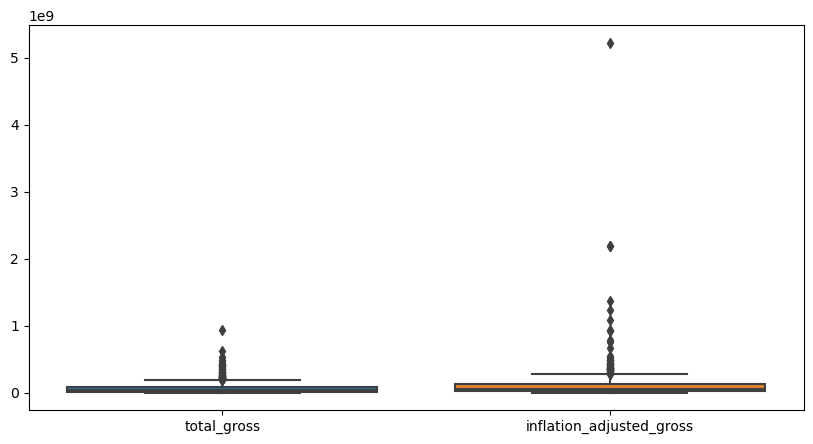

In [9]:
#Creating box plot

#Defined the function for future easy references.
def createBoxPlot(data): 
    box_plot = plt.figure(figsize = (10,5))
    sns.boxplot(data)
    box_plot.show()

createBoxPlot(data)

#### Visualizing Outliers using Histograms

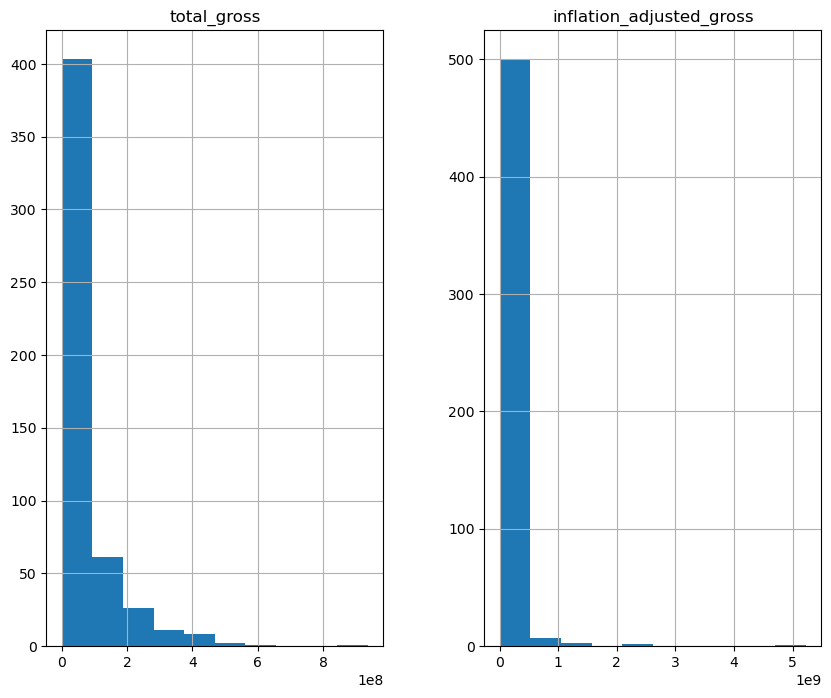

In [10]:
#Creating histograms
def createHistogram(data, bins = 10):
    data.hist(figsize=(10,8), bins=bins)

createHistogram(data)

#### Using normal distributions to remove outliers


Using normal distribution, we're removing rows with absolute z-score of more than 3.

In [11]:
# List outliers which 'total_gross' column has abs z-scores which exceeds 3.
outliers = data[(abs(zscore(data.total_gross)) > 3)]
if 'z-index' not in outliers.columns:
    outliers.insert(outliers.shape[1]-1, 'z-index', zscore(data.total_gross))
display(outliers)

,movie_title,release_date,genre,mpaa_rating,total_gross,z-index,inflation_adjusted_gross
179,The Lion King,1994-06-15,Adventure,G,422780140,3.635542,761640898
384,Finding Nemo,2003-05-30,Adventure,G,380529370,3.198510,518148559
441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,3.641083,544817142
499,Toy Story 3,2010-06-18,Adventure,G,415004880,3.555116,443408255
524,The Avengers,2012-05-04,Action,PG-13,623279547,5.709462,660081224
532,Iron Man 3,2013-05-03,Action,PG-13,408992272,3.492923,424084233
539,Frozen,2013-11-22,Adventure,PG,400738009,3.407543,414997174
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,4.010252,459005868
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,8.951020,936662225
567,The Jungle Book,2016-04-15,Adventure,PG,364001123,3.027545,364001123


#### Visualizations after removing outliers

After removing outliers, the result dataframe are as following, followed by the box plot and histogram.

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
573,Pete’s Dragon,2016-08-12,Adventure,PG,76233151,76233151
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923


C:\Users\Fang\AppData\Local\Temp\ipykernel_22716\1733202113.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  box_plot.show()


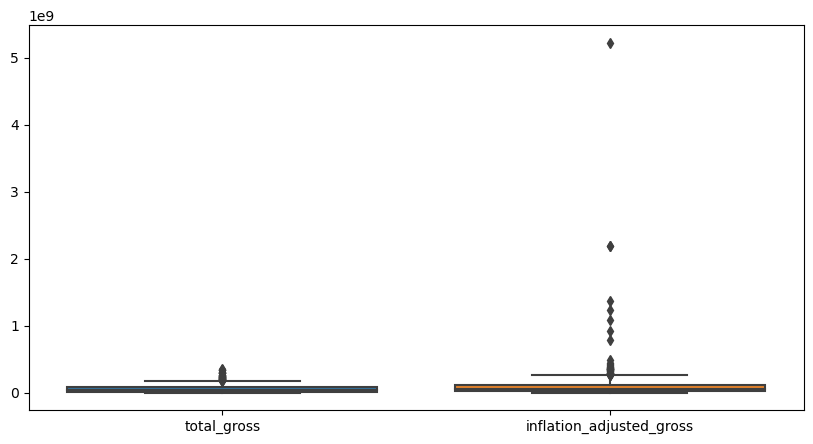

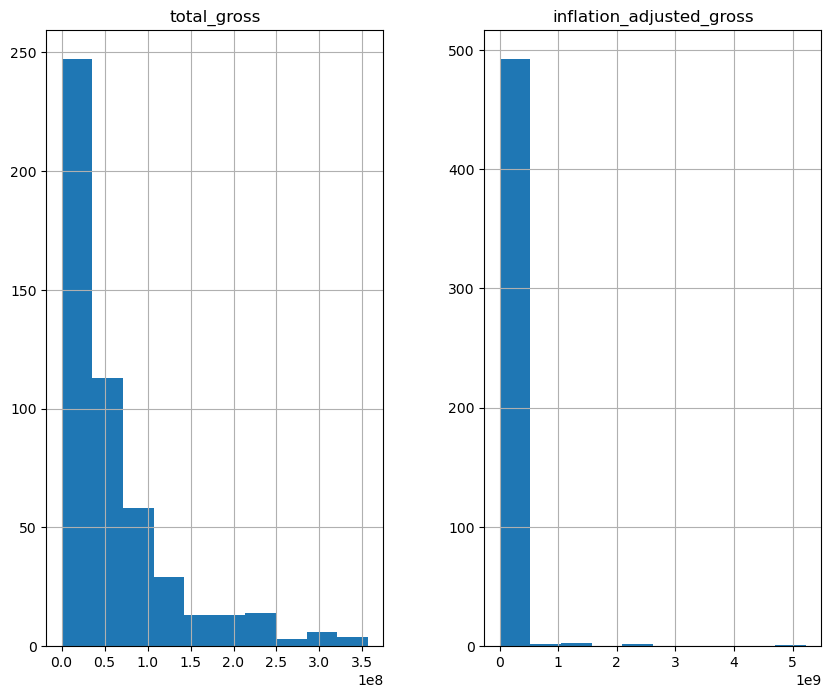

In [12]:
# Display result dataframe after removing outliers by removing intesected rows.
data = data.drop(index = outliers.index)

display(data)
createBoxPlot(data)
createHistogram(data)

## Perform any additional steps (e.g., parsing dates, creating additional columns, merging multiple datasets, etc.).

### Parsing date column (`release_date`)

We chose to parse the date and split them into three new columns, that are:

- Year of `release_date` extracted and stored into `release_year` column,
- Month of `release_date` extracted and stored into `release_month` column, and
- Day of `release_date` extracted and stored into `release_day` column.

In [13]:
# Parse the date from 'release_date' column and split it.
data['release_date'] = pd.to_datetime(data['release_date'], format="%Y-%m-%d")
# Add release day
if 'release_day' not in data.columns:
    data.insert(1, 'release_day', data['release_date'].dt.day)
# Add release month
if 'release_month' not in data.columns:
    data.insert(1, 'release_month', data['release_date'].dt.month)
# Add release year
if 'release_year' not in data.columns:
    data.insert(1, 'release_year', data['release_date'].dt.year)

display(data)

,movie_title,release_year,release_month,release_day,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937,12,21,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940,2,9,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940,11,13,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946,11,12,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950,2,15,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...,...,...,...
573,Pete’s Dragon,2016,8,12,2016-08-12,Adventure,PG,76233151,76233151
574,The Light Between Oceans,2016,9,2,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016,9,23,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016,11,4,2016-11-04,Adventure,PG-13,232532923,232532923


### Feature Selection

Using Lasso Regression, the features are recorded as following:


Best alpha using built-in LassoCV: 115137337.610252
Best score using built-in LassoCV: 0.000000

release_year     1.434555e-10
release_month    0.000000e+00
release_day     -0.000000e+00
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

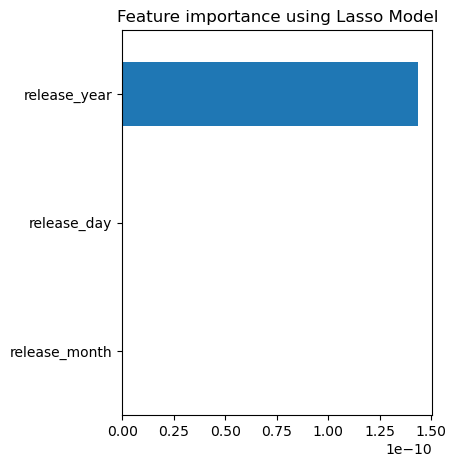

In [14]:
from sklearn.linear_model import LassoCV

x = data.drop(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross', 'inflation_adjusted_gross'], axis = 1)
y = data['total_gross']

reg = LassoCV()
reg.fit(x,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(x,y))
coef=pd.Series(reg.coef_, index=x.columns)
print(f"\n{coef}")

# The plot figure below shows which features are selected
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (4.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [15]:
print("Lasso picked " + str(sum(coef != 0))+" variables and eliminated the other " + str(sum(coef == 0)) + " variables.\n")
print(f"The selected features are: \n{coef[coef != 0]}")

Lasso picked 1 variables and eliminated the other 2 variables.

The selected features are: 
release_year    1.434555e-10
dtype: float64


Hence, only `release_year` is taken as the feature. 

<div style="page-break-after: always;"></div>

\newpage

# Exploratory Data Analysis  
## Compute the mean, sum, range and other interesting statistics for numeric columns.

There are several types of Exploratory Data Analysis (EDA) that can be done in this dataset. Those includes:

- The average gross income per movie,
- Gross/Inflation adjusted gross or count that are based on each Disney movie's release year, or
- Gross/Inflation adjusted gross or count that are based on each type of genre.

### Summary Statistics on Gross Income per movie

We can compute the summary statistics on gross income per movie, using `total_gross` column and `inflation_adjusted_gross`, by using `describe()` method

The following method supresses the scientific notation of the values of the data.
> `.apply(lambda s: s.apply('{0:.5f}'.format))`

In [16]:
# Supress scientific notation of dataframe
def display_without_scientific_notation(df):
    display(df.apply(lambda s: s.apply('{0:.4f}'.format)))

# Summary statistics on gross income per movie
display_without_scientific_notation(data.describe().drop(['release_year', 'release_month', 'release_day'], axis=1))

,total_gross,inflation_adjusted_gross
count,500.0000,500.0000
mean,60646181.6260,117010079.7980
std,67432931.7377,296968001.7232
min,2815.0000,2984.0000
25%,15442085.7500,25515774.7500
50%,36773431.0000,57885202.0000
75%,80176773.2500,119168305.2500
max,356461711.0000,5228953251.0000


### Gross income based on each year
We can summarize and aggregate the data by taking each unique rows of `release_year`, by using `.groupby().agg()` function. This will be stored as `data_release`.

In [17]:
data_release = data.groupby(['release_year']).agg({'total_gross':['mean', 'count', 'sum']})
display_without_scientific_notation(data_release.head())

total_gross                        
                        mean   count             sum
release_year                                        
1937          184925485.0000  1.0000  184925485.0000
1940           83810000.0000  2.0000  167620000.0000
1946           65000000.0000  1.0000   65000000.0000
1950           85000000.0000  1.0000   85000000.0000
1955           93600000.0000  1.0000   93600000.0000

### Gross income based on genre
Apart from that, we can also summarize and aggregate the data by taking each type of `genre`. This will be stored as `data_genre`.

In [18]:
data_genre = data.groupby(['genre']).agg({'total_gross':['mean', 'count', 'sum']})
display_without_scientific_notation(data_genre.head())

total_gross                            
                               mean     count               sum
genre                                                          
Action                69472727.4375   32.0000   2223127278.0000
Adventure            107451380.9909  110.0000  11819651909.0000
Black Comedy          32514404.0000    3.0000     97543212.0000
Comedy                48088475.7901  162.0000   7790333078.0000
Concert/Performance   51728233.0000    2.0000    103456466.0000

\newpage

# Data Visualization   
## Explore distributions of numeric columns using histograms, etc.
### Histograms

This command showed all the numeric columns of dataset in histogram. From the histogram below, we can observe that the histogram of `release_year` and `release_date` is normal histogram. For `release_month`, it is a bimodal histogram and `release_day` is non-normal histogram. Besides, `total_gross` and `inflation_adjusted_gross` is skewed right histogram.

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'release_month'}>],
       [<Axes: title={'center': 'release_day'}>,
        <Axes: title={'center': 'release_date'}>],
       [<Axes: title={'center': 'total_gross'}>,
        <Axes: title={'center': 'inflation_adjusted_gross'}>]],
      dtype=object)

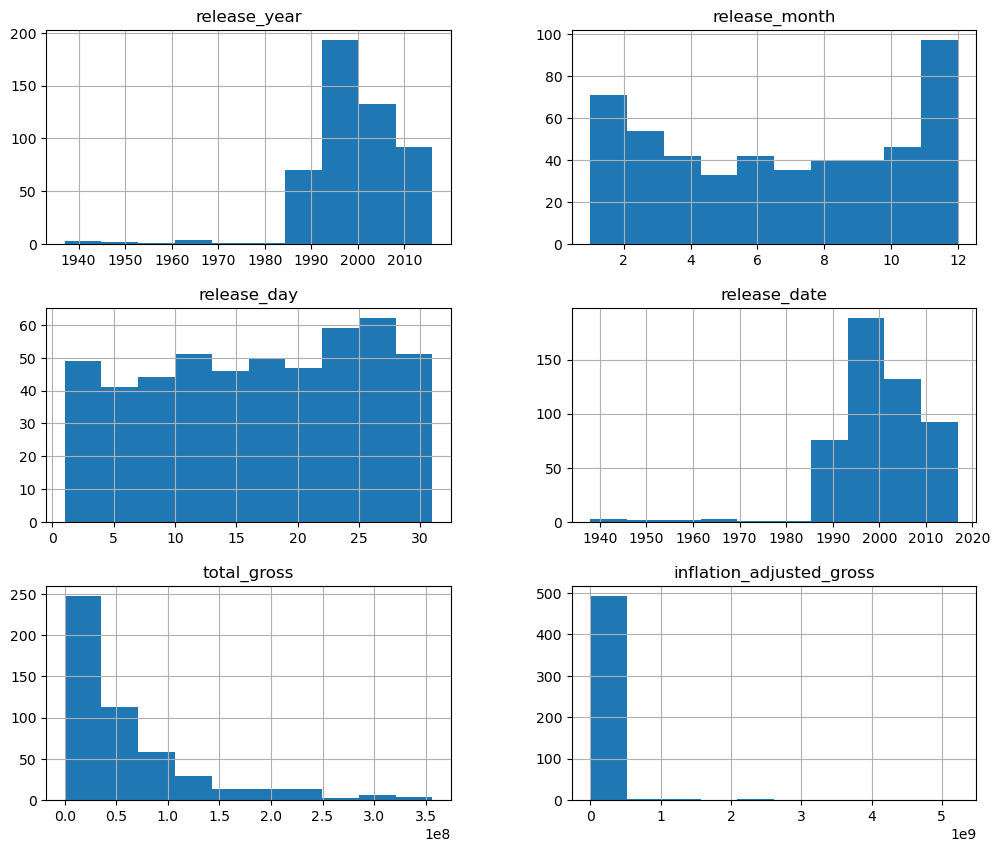

In [40]:
#histogram
data.hist(figsize=(12,10))

### Distribution plot (`total_gross`)

We use distribution plot to graphically represent the distribution of `total_gross` variable. Distribution plot allows us to
see the distribution of the data more visually than a normal histogram. From the graph below, we can know this is a skewed 
right histogram because majority of the data points are concentrated on the left side of the histogram.We can also know this 
is a positive skewed distribution by looking at the distribution line.

C:\Users\Fang\AppData\Local\Temp\ipykernel_22716\2332603461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.total_gross)


<Axes: xlabel='total_gross', ylabel='Density'>

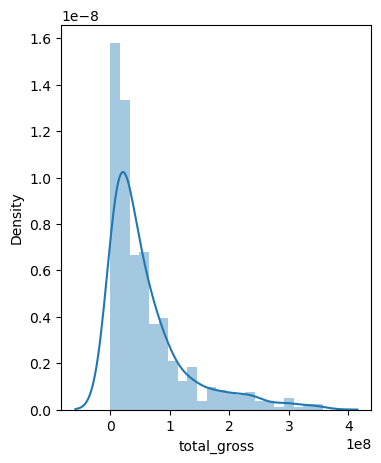

In [41]:
# Distribution plot (total_gross)
sns.set_style()
sns.distplot(data.total_gross)

### Distribution plot (`inflation_adjusted_gross`)

Same with above, we still use distribution plot to graphically represent the distribution of 'inflation_adjusted_gross' 
variable. As a result, we can know this is also a skewed right histogram and positive skewed distribution.

C:\Users\Fang\AppData\Local\Temp\ipykernel_22716\3166487301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.inflation_adjusted_gross)


<Axes: xlabel='inflation_adjusted_gross', ylabel='Density'>

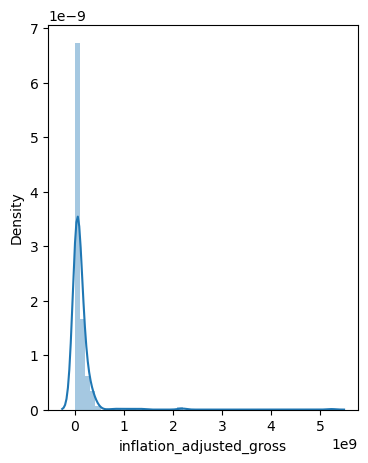

In [21]:
# Distribution plot (inflation_adjusted_gross)
sns.distplot(data.inflation_adjusted_gross)

## Explore relationship between columns using scatter plots, bar charts, etc.  

### Scatter plot

We create scatter plot to explore the relationship between release year and gross income. The plot showed that there is no
strong relationship between release year and gross income of movie.

Text(0.5, 1.0, 'Relationship between release year and gross income')

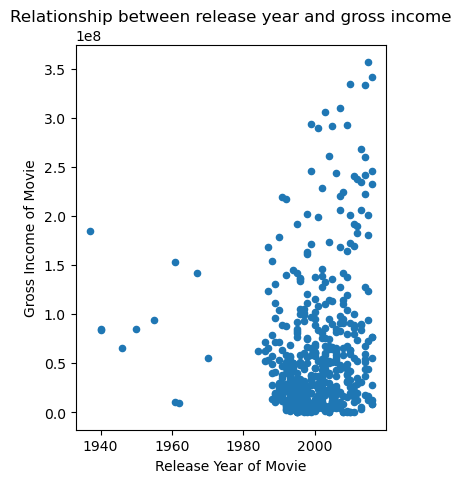

In [22]:
# Scatterplot
data.plot(kind='scatter',x='release_year',y='total_gross')
plt.xlabel('Release Year of Movie')
plt.ylabel('Gross Income of Movie')
plt.title('Relationship between release year and gross income')

### Count plot (Genre)

By using countplot in this case, it can help us automatic count the number of movies per genre. So, we can simply and quickly know which genre of film does Disney produce the most. From the graph, it show that the comedy genre of movie is the most produced, while concert/performance genre of movie is the least produced by Disney.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Thriller/Suspense'),
  Text(5, 0, 'Romantic Comedy'),
  Text(6, 0, 'Documentary'),
  Text(7, 0, 'Musical'),
  Text(8, 0, 'Western'),
  Text(9, 0, 'Horror'),
  Text(10, 0, 'Black Comedy'),
  Text(11, 0, 'Concert/Performance')])

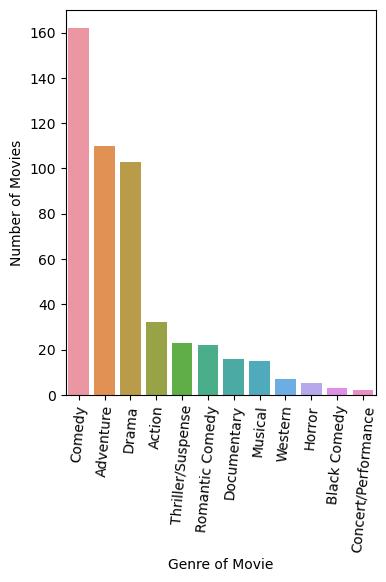

In [23]:
# Count plot (Genre)
sns.countplot(x='genre',data=data,order=data['genre'].value_counts().index)
plt.xlabel('Genre of Movie')
plt.ylabel('Number of Movies')
plt.xticks(rotation=85)

### Count plot (MPAA Rating)

In this case, countplot help us count the number of movies clustered by mpaa rating automatically. So, we can simply know
Disney has produced the most PG rated film.

Text(0, 0.5, 'Number of Movies')

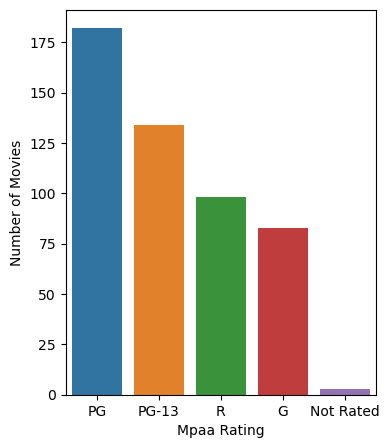

In [24]:
# Count plot (MPAA Rating)

sns.countplot(x='mpaa_rating',data=data,order=data['mpaa_rating'].value_counts().index)
plt.xlabel('Mpaa Rating')
plt.ylabel('Number of Movies')

### Heatmap

We use heatmap to effectively shows the correlation between each numeric columns at the same time. By looking at the heatmap below, we can observe `release_year`, `release_month`, and `inflation_adjusted_gross` has a positive correlation with total gross income, while `release_day` has a negative correlation with gross income.

C:\Users\Fang\AppData\Local\Temp\ipykernel_22716\1596995075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<Axes: >

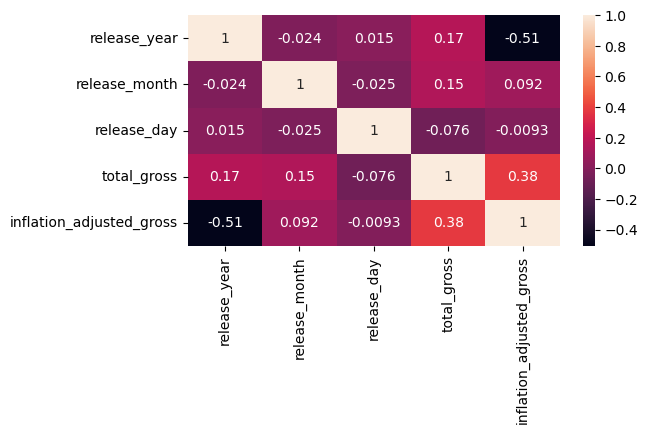

In [25]:
# Heatmap
cor=data.corr()
plt.figure(figsize=(6,3))
sns.heatmap(cor, annot=True)

\newpage

# Discussion
  
Provide answers to the proposed 4 questions and justify your answers using data analytics. 


## What are the top 10 Disney movie by gross income?

To find out the Top 10 best selling Disney Movie, we use `sort_values()` function,sort it in descending order and then print the first 10 data. To make it more visualizable, we have show it in bar chart. From the barchart, we can simply know the movie, "Inside Out" is the best selling Disney movie then followed by Zootopia, Alice in Wonderland and so on.

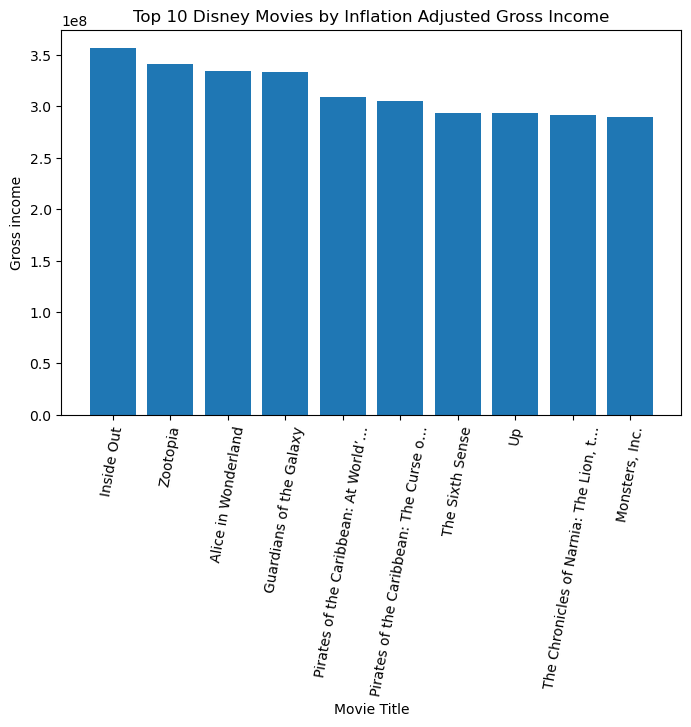

In [35]:
#1. What is the top 10 best selling Disney movie?
data.sort_values(by='total_gross', inplace=True, ascending=False)
data.head(10)
top_10_movies=data.head(10)
plt.figure(figsize=(8, 5))  

plt.bar(top_10_movies['movie_title'], top_10_movies['total_gross'])
plt.xlabel('Movie Title')
plt.ylabel('Gross income')
plt.title('Top 10 Disney Movies by Inflation Adjusted Gross Income')

plt.xticks(rotation=80)
plt.show()

## Which genre of Disney movie is the most popular? Which genre of movie has highest average of gross income?

To answer this question, we have use barplot to show the relationship between genre of movie and its gross income because the higher the gross income of a movie, represents the more popular it is. Then, looking at the following barplot, we can easily know that the adventure genre of movie is the most popular with the public because it earns the highest gross income.


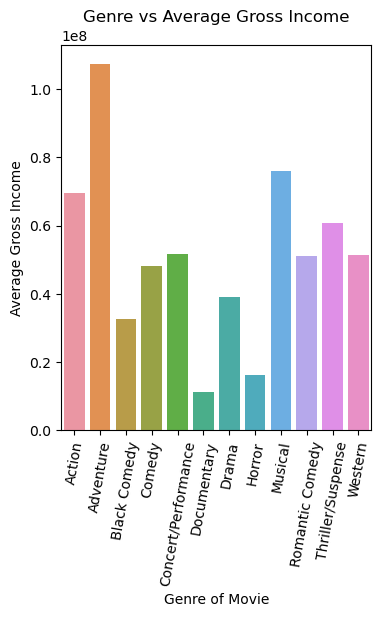

In [39]:
#2. Which genre of Disney Movie is the most popular?
#barplot
average_gross=data.groupby('genre')['total_gross'].mean().reset_index()
sns.barplot(x='genre',y='total_gross',data=average_gross)
plt.xlabel('Genre of Movie')
plt.ylabel('Average Gross Income')
plt.title('Genre vs Average Gross Income')

plt.xticks(rotation=80)

plt.show()

## Does Mpaa rating will affect the gross income of Disney Movie?

In order to answer this question, We are using 2 variables to compare the relationship between MPAA Rating and Average
Gross Income of the movies. Based on the data analytic, PG-rated movies are the most produced by Disney compared to 
others rated movies. However, according to the histogram below, we observed that the most earning is the rating of G. This
rating means all ages of audience admitted, so it has a wider audience compared to other ratings. Therefore, we can conclude
that the mpaa rating will affect the gross income of Disney Movie.

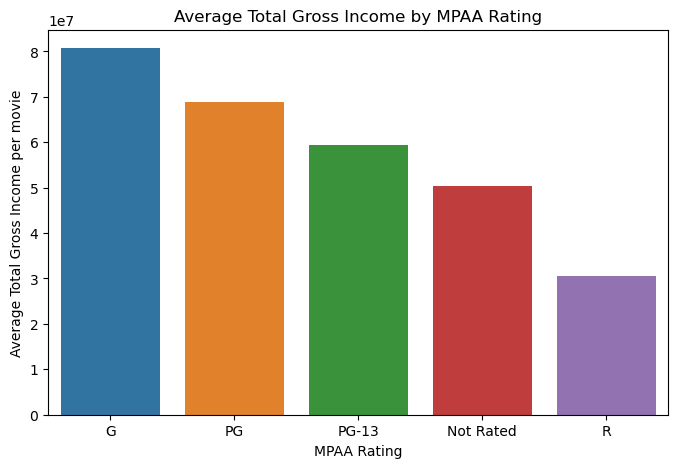

In [44]:
average_gross_by_rating = data.groupby('mpaa_rating')['total_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))

sns.barplot(x=average_gross_by_rating.index, y=average_gross_by_rating.values)

plt.xlabel('MPAA Rating')
plt.ylabel('Average Total Gross Income per movie')
plt.title('Average Total Gross Income by MPAA Rating')
plt.show()


## From 1937 to 2016, how much has Disney movie gross income grown each year?

We apply 2 variables, `release_year` and total `gross_income` to display the trend and pattern of total gross income by release year. For this question we apply a line graph, blue line in the plot connects the data points for each year, showing the yearly growth in gross income. According to the line graph, we observed that the year between 1937 until 1984, It indicates a negative growth or a decrease in gross income compared to the previous year, the overall increase is not obvious. But the year after 1984 until 2016, it indicates a positive growth in gross income compared to the previous year. From the trend of line, the year between 1985 to 2016 has some fluctuations, but seen in their entirely, it has a consistently increasing line, it means that it suggests steady growth. In conclusion, the total gross income of Disney movies released in the years fluctuates, with increasing trend.

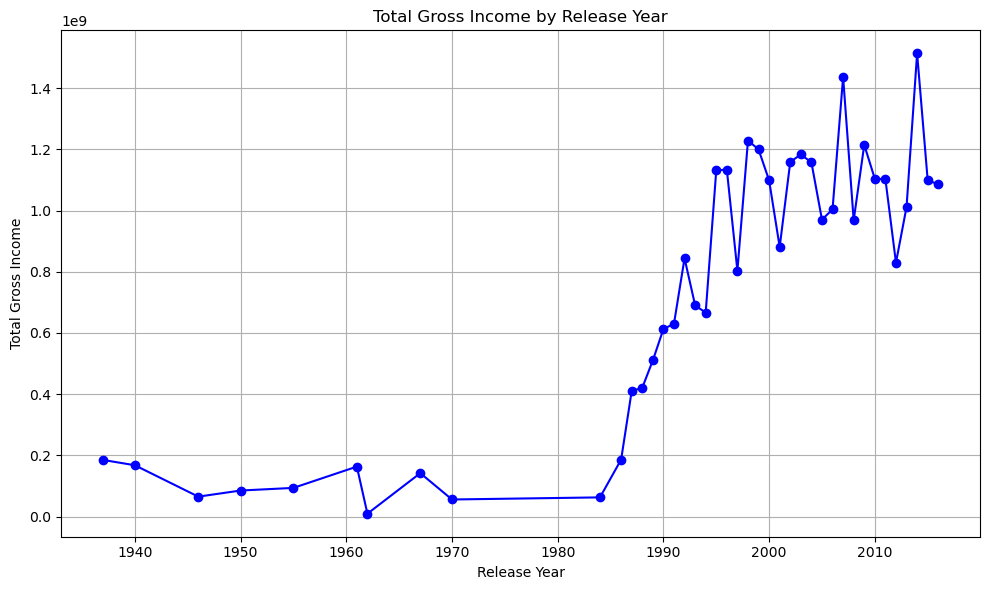

In [37]:
yearly_gross = data.groupby('release_year')['total_gross'].sum().reset_index()
plt.figure(figsize=(10, 6)) 
plt.plot(yearly_gross['release_year'], yearly_gross['total_gross'], marker='o', linestyle='-', color='b')

plt.xlabel('Release Year')
plt.ylabel('Total Gross Income')
plt.title('Total Gross Income by Release Year')

plt.grid(True)
plt.tight_layout()
plt.show()

\newpage

# Conclusion

In conclusion, this data wrangling project which focused on analysing the gross income of Disney movies is a step in extracting meaningful insights from a diverse and complex dataset. Through some process such as data cleaning, organizing, and structuring, we have successfully prepared the data for in-depth analysis. Throughout this project, we have used some techniques to handle missing data and outliers to ensure the reliability and consistency of dataset. Besides, we have also used many ways including using histogram, box plot and many more to visualise the data pattern.

After completing the data wrangling phase, we have a well-structured dataset that is ready for further analysis. This clean and organised data will be used to exploring various aspects of Disney's movie income, such as trends over time and the impact of specific movie genre. Data wrangling has not only made the dataset suitable and easy for analysis but has also set the stage for creating informative data visualisations that will help stakeholders and decision-makers gain a deeper understanding of Disney's movie gross income patterns. Then, it can help them to make more accurate business decisions.


\newpage

# References

- (Dataset) Disney Movies 1937-2016 Gross Income (March 14, 2021). Retrieved from https://www.kaggle.com/datasets/rashikrahmanpritom/disney-movies-19372016-total-gross
- Simplilearn. (2023, Jun 6). What Is Data Wrangling? Benefits, Tools, Examples and Skills. Retrieved from https://www.simplilearn.com/data-wrangling-article